<a href="https://colab.research.google.com/github/asurovi/MSE504_MachineLearning/blob/main/Homework_6_AgnilaGhoshSurovi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MSE 504 — Homework 6 (Dimensionality Reduction)

**Name: Agnila Ghosh Surovi**

**Department: Mechanical and Aerospace Engineering**

**Date: 9/28/2025**

# Imports

0. Add imports as necessary

In [ ]:
from copy import deepcopy as dc

import numpy as np
from sklearn import decomposition

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Problem 1 - PCA

1. Create the data set:
- Import the MNIST data set (from Keras)
- Select the images corresponding to single digit (e.g. 7)
- Run the PCA analysis on images

## Answer 1:

In [ ]:
# import the MNIST data set from keras
from tensorflow import keras
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print("x_train size: ", x_train.shape)
print("y_train size: ", y_train.shape)
print("x_test size: ", x_test.shape)
print("y_test size: ", y_test.shape)

# combine test and train sets into one
X = np.concatenate([x_train, x_test], axis = 0)
y = np.concatenate([y_train, y_test], axis = 0)

print("All images:", X.shape)   # (70000, 28, 28)
print("All labels:", y.shape)   # (70000,)

#-------------------------------------------------------------------------------
# select the images corresponding to single digit 7
digit = 7
mask = (y == digit) # boolean mask: True where label==7
X_digit = X[mask]
y_digit = y[mask]

print(f"Digit {digit} images shape: ", X_digit.shape)
print(f"Digit {digit} labels shape: ", y_digit.shape)

#-------------------------------------------------------------------------------
# Run PCA (Principle Component Analysis)
from sklearn.decomposition import PCA
n_samples = X_digit.shape[0]
X_flat = X_digit.reshape(n_samples, -1) #-1 = “NumPy, you figure out how many columns are needed.”

print("Samples:", n_samples)
print("Reshaped shape:", X_flat.shape)

pca = PCA(n_components=50) # enough to capture most of the meaningful variation in MNIST digits
X_pca = pca.fit_transform(X_flat)

print("PCA transformed shape:", X_pca.shape)


x_train size:  (60000, 28, 28)
y_train size:  (60000,)
x_test size:  (10000, 28, 28)
y_test size:  (10000,)
All images: (70000, 28, 28)
All labels: (70000,)
Digit 7 images shape:  (7293, 28, 28)
Digit 7 labels shape:  (7293,)
Samples: 7293
Reshaped shape: (7293, 784)
PCA transformed shape: (7293, 50)


2. Visualize the scree plot

## Answer 2:

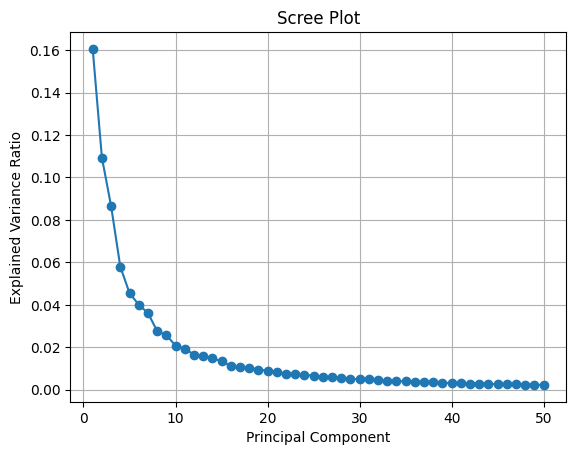

In [ ]:
explained = pca.explained_variance_ratio_

plt.plot(np.arange(1, len(explained)+1), explained, marker='o')
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot")
plt.grid(True)
plt.show()

The scree plot suggests that first 10–20 components are enough to capture the main structure of the digit images.

3. Visualize the PCA components and loadings distribution (the first two components)

## Answer 3:

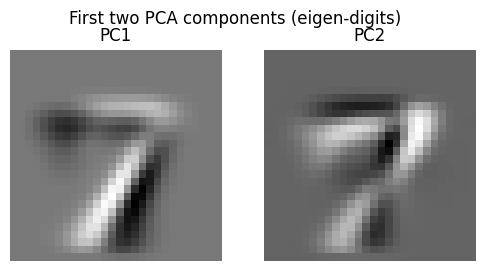

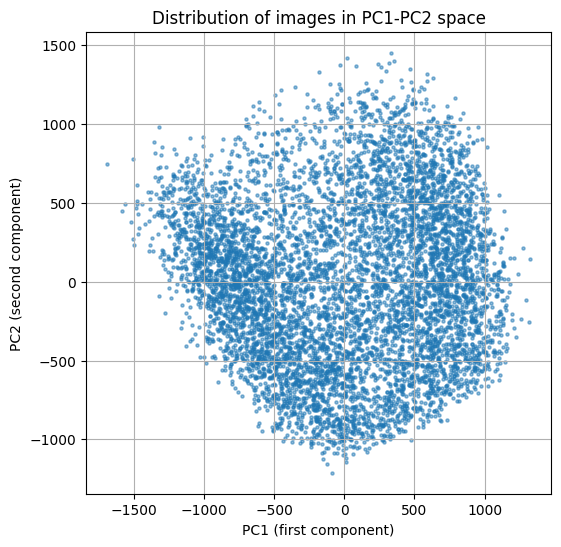

In [ ]:
# 1. Visualize the first two PCA components as images
plt.figure(figsize=(6,3))

for i in range(2):
    components = pca.components_[i]
    components = components.reshape(28,28)
    plt.subplot(1,2,i+1)
    plt.imshow(components, cmap="gray")
    plt.title(f"PC{i+1}")
    plt.axis("off")

plt.suptitle("First two PCA components (eigen-digits)")
plt.show()

# 2. Visualize loadings distribution (scatter plot of scores)
plt.figure(figsize=(6,6))
plt.scatter(X_pca[:,0], X_pca[:,1], s=5, alpha=0.5)
plt.xlabel("PC1 (first component)")
plt.ylabel("PC2 (second component)")
plt.title("Distribution of images in PC1-PC2 space")
plt.grid(True)
plt.show()


4. Generative model:
- run the PCA analysis with 2 components
- sample the loading space with the rectangular grid
- generate the images from the loading space (i.e. create latent representation)
- do you observe any trends in images across the loading space?

## Answer 4:

PCA transformed shape with 2 components: (7293, 2)
Grid points shape: (100, 2)
Generated images shape: (100, 784)


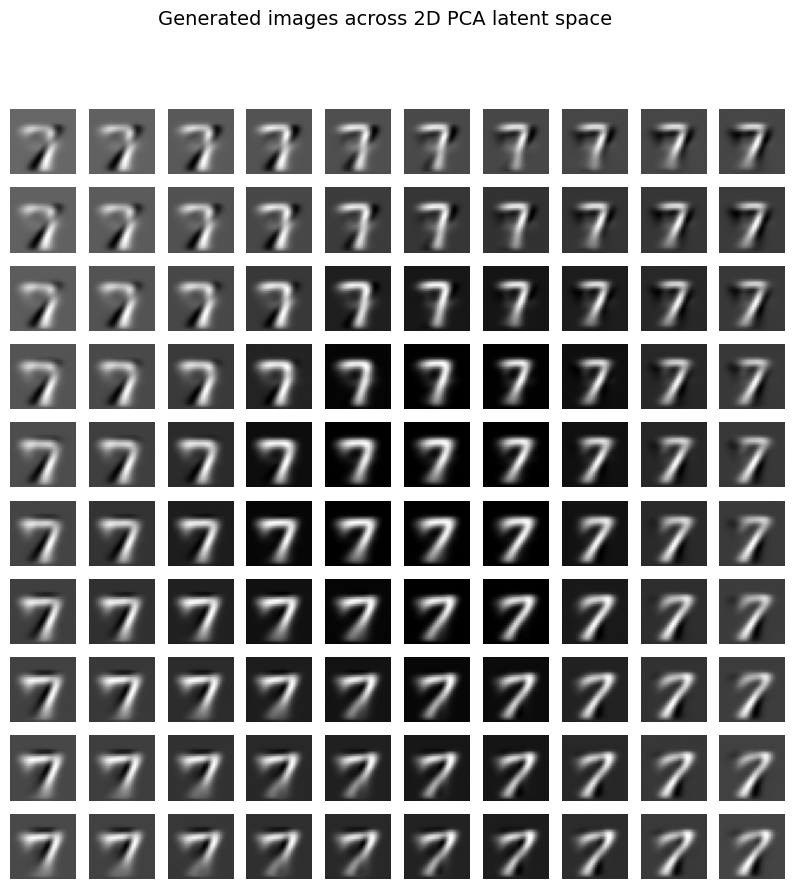

In [ ]:
# run the PCA analysis with 2 components
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X_flat)   # shape (N, 2)

print("PCA transformed shape with 2 components:", X_pca2.shape)

# ------------------------------------------------------------------------------
# sample the loading space with the rectangular grid

# Take range of scores along PC1 and PC2
x_min, x_max = X_pca2[:,0].min(), X_pca2[:,0].max()
y_min, y_max = X_pca2[:,1].min(), X_pca2[:,1].max()

# Make a grid of points in this space
grid_x, grid_y = np.meshgrid(
    np.linspace(x_min, x_max, 10),   # 10 steps along PC1
    np.linspace(y_min, y_max, 10)    # 10 steps along PC2
)

grid_points = np.column_stack([grid_x.ravel(), grid_y.ravel()])
print("Grid points shape:", grid_points.shape)

#-------------------------------------------------------------------------------
# generate the images from the loading space (i.e. create latent representation)
X_generated = pca2.inverse_transform(grid_points)  # back to 784 pixels
print("Generated images shape:", X_generated.shape)

#-------------------------------------------------------------------------------
# do you observe any trends in images across the loading space?
plt.figure(figsize=(10, 10))
for i, (gx, gy) in enumerate(grid_points):
    plt.subplot(10, 10, i+1)
    plt.imshow(X_generated[i].reshape(28,28), cmap="gray")
    plt.axis("off")

plt.suptitle("Generated images across 2D PCA latent space", fontsize=14)
plt.show()


PCA is run with two components to reduce the digit “7” images into a 2-dimensional latent space. A rectangular grid is sampled in this space, and the corresponding images are reconstructed back into 28×28 pixels. The generated grid of images shows smooth variations in handwriting style.

* Movement along x axis mainly changes the slant and thickness of the strokes,

* while movement along the y axis modifies the contrast or brightness and the appearance of the top bar of the digit.

These observations indicate that the two principal components capture the dominant trends in handwriting variation, and the latent space can act as a simple generative model for producing different styles of the same digit.

5. In the PCA generative model, each image is represented by 2 PCA loadings. Where does the information to "reconstruct" images come from?

## Answer 5:

In the PCA generative model, each image is represented by two loadings (scores) along the first two principal components. The information to reconstruct images comes from the **principal component vectors (eigenvectors)** and the **mean image** that are obtained during PCA training.

The reconstruction is computed as:

$$
\hat{x} = \mu + z_1 \cdot \mathbf{p}_1 + z_2 \cdot \mathbf{p}_2
$$

where

* $\mu$ = mean image,
* $z_1, z_2$ = loadings (scores) for the first and second components,
* $\mathbf{p}_1, \mathbf{p}_2$ = first and second principal component vectors.

Thus, the images are generated by combining the mean image with weighted contributions of the principal component vectors using the loadings as weights.

6. (Optional). Create a function that analyzes the "writing style" of the reconstructed image, meaning function transforming (image) -> (several scalar descriptors). For example, it can be the tilt and axis ratio of the tensor of moments of inertia for binarized image. Map this function over the latent space of the model.

## Answer 6:

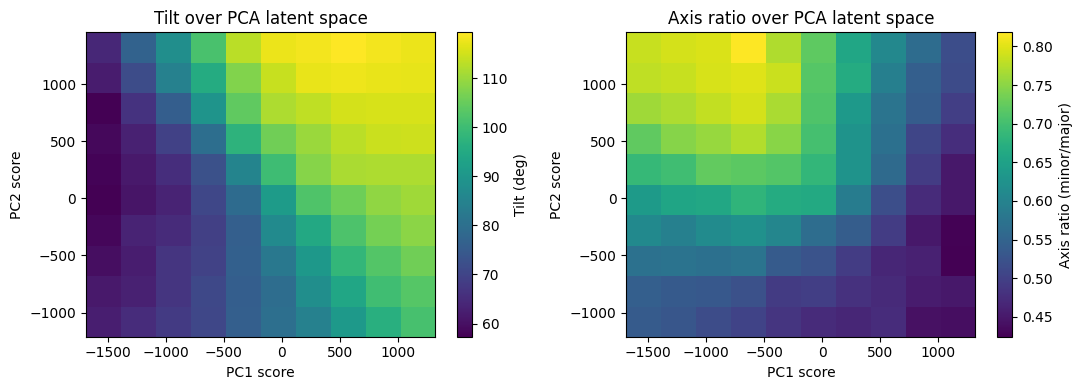

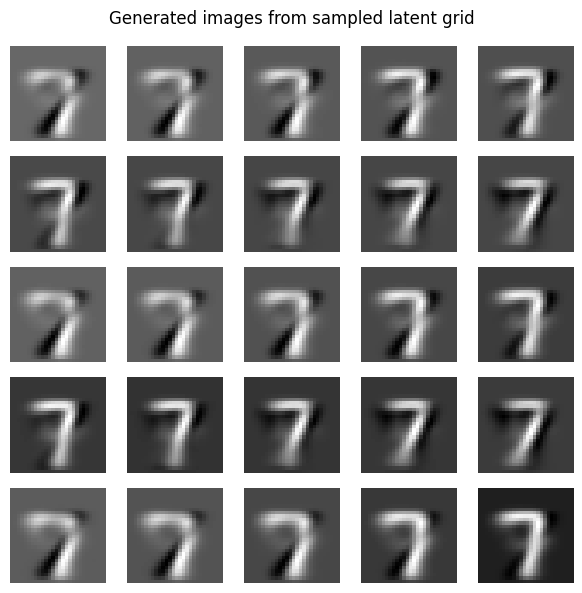

In [ ]:
# ---------- 1) Style descriptors from one image ----------
def shape_descriptors(img, thresh=None):
    """
    Input:
      img  : (28x28) grayscale, any floating scale
      thresh: optional binarization threshold. If None -> Otsu-like heuristic (mean + 0.25*std)
    Output:
      tilt_deg     : orientation (degrees) of major axis in image coordinates
      axis_ratio   : minor/major axis length ratio in [0,1]
    """
    I = img.astype(np.float64)
    I = (I - I.min()) / (np.ptp(I) + 1e-12)  # normalize to [0,1]

    # --- binarize (simple robust heuristic if thresh not given) ---
    if thresh is None:
        thresh = I.mean() + 0.25 * I.std()
    B = (I >= thresh).astype(np.float64)

    # if image is blank after thresholding, fall back to all pixels as mass
    if B.sum() < 5:
        B = (I >= I.mean()).astype(np.float64)

    # --- pixel coordinates (x=cols, y=rows) ---
    h, w = B.shape
    ys, xs = np.mgrid[0:h, 0:w]

    # --- centroid (mass-weighted by binary mask) ---
    m = B.sum()
    cy = (B * ys).sum() / (m + 1e-12)
    cx = (B * xs).sum() / (m + 1e-12)

    # --- central second moments / covariance-like matrix ---
    y0 = ys - cy
    x0 = xs - cx
    mu_xx = (B * (x0 ** 2)).sum() / (m + 1e-12)
    mu_yy = (B * (y0 ** 2)).sum() / (m + 1e-12)
    mu_xy = (B * (x0 * y0)).sum() / (m + 1e-12)

    C = np.array([[mu_xx, mu_xy],
                  [mu_xy, mu_yy]])

    # --- eigen-decomposition: eigenvectors = principal axes ---
    vals, vecs = np.linalg.eigh(C)          # vals sorted ascending
    lam_min, lam_max = vals[0], vals[1]
    v_max = vecs[:, 1]                      # major-axis direction

    # --- axis ratio (minor/major). Use sqrt because lengths ~ sqrt(variance)
    axis_ratio = np.sqrt(max(lam_min, 0.0) / (max(lam_max, 1e-12)))

    # --- tilt angle (in degrees) of major axis relative to +x (image columns)
    tilt_rad = np.arctan2(v_max[1], v_max[0])
    tilt_deg = np.degrees(tilt_rad)

    return float(tilt_deg), float(np.clip(axis_ratio, 0.0, 1.0))


# ---------- 2) Map descriptors over the latent grid ----------
def analyze_latent_grid(pca2, X_flat, steps=10):
    """
    Uses the fitted 2D PCA (pca2) and the original flattened data X_flat (N x 784).
    1) Builds a rectangular grid in the 2D score space.
    2) Inverse-transforms grid points to images.
    3) Computes tilt and axis ratio for each grid image.
    4) Returns grids and makes diagnostic plots.
    """
    # project data to get latent ranges
    Z = pca2.transform(X_flat)         # (N, 2)
    x_min, x_max = Z[:, 0].min(), Z[:, 0].max()
    y_min, y_max = Z[:, 1].min(), Z[:, 1].max()

    gx, gy = np.meshgrid(np.linspace(x_min, x_max, steps),
                         np.linspace(y_min, y_max, steps))

    grid_points = np.column_stack([gx.ravel(), gy.ravel()])      # (steps^2, 2)
    X_gen = pca2.inverse_transform(grid_points)                  # (steps^2, 784)

    tilts = np.zeros(steps * steps, dtype=float)
    ratios = np.zeros(steps * steps, dtype=float)

    for i in range(steps * steps):
        img = X_gen[i].reshape(28, 28)
        tilt_deg, axis_ratio = shape_descriptors(img)
        tilts[i] = tilt_deg
        ratios[i] = axis_ratio

    tilt_grid = tilts.reshape(steps, steps)
    ratio_grid = ratios.reshape(steps, steps)

    # --- visualize descriptor fields over latent space ---
    extent = [x_min, x_max, y_min, y_max]

    plt.figure(figsize=(11,4))
    plt.subplot(1,2,1)
    plt.imshow(tilt_grid, origin='lower', extent=extent, aspect='auto')
    plt.colorbar(label="Tilt (deg)")
    plt.title("Tilt over PCA latent space")
    plt.xlabel("PC1 score"); plt.ylabel("PC2 score")

    plt.subplot(1,2,2)
    plt.imshow(ratio_grid, origin='lower', extent=extent, aspect='auto')
    plt.colorbar(label="Axis ratio (minor/major)")
    plt.title("Axis ratio over PCA latent space")
    plt.xlabel("PC1 score"); plt.ylabel("PC2 score")

    plt.tight_layout()
    plt.show()

    return (gx, gy), tilt_grid, ratio_grid, X_gen
# --- Load MNIST and pick one digit (e.g., 7) ---
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
X = np.concatenate([x_train, x_test], axis=0)
y = np.concatenate([y_train, y_test], axis=0)

DIGIT = 7
X_digit = X[y == DIGIT]
N = X_digit.shape[0]
X_flat = X_digit.reshape(N, -1).astype(np.float32)
# --- Fit PCA with 2 components (needed by analyze_latent_grid) ---
pca2 = PCA(n_components=2, svd_solver="randomized", random_state=42).fit(X_flat)

# --- Call it (this is the part you were missing) ---
(gx, gy), tilt_grid, ratio_grid, X_gen = analyze_latent_grid(pca2, X_flat, steps=10)

# (Optional) Small gallery of generated images for sanity check
plt.figure(figsize=(6,6))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_gen[i].reshape(28,28), cmap="gray")
    plt.axis("off")
plt.suptitle("Generated images from sampled latent grid")
plt.tight_layout()
plt.show()

# Problem 2 - LDA

7. Here, we will run the LDA on the MNIST data set.
- Identify (any) 3 digits that you would like to explore and assign as classes 1, 2, and 3
- Designate all other digits as class 0
- Run the LDA analysis
- If the analysis takes too long (>5 min), decimate the data set as [::10]

## Answer 7:

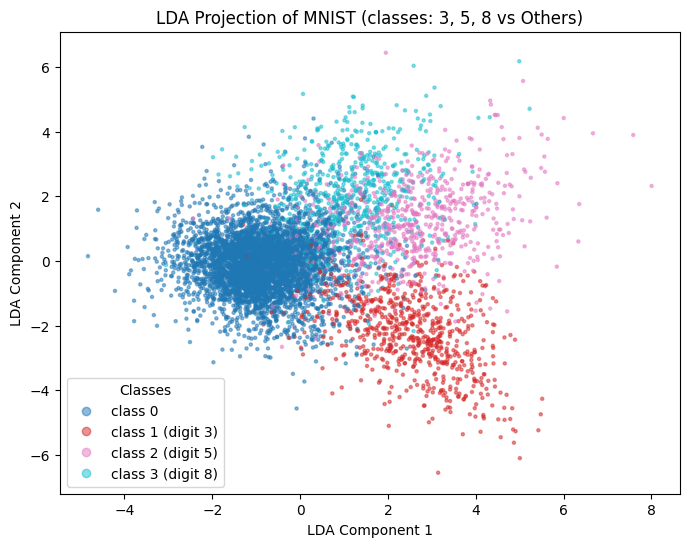

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# 1. Load MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
X = np.concatenate([x_train, x_test], axis=0)
y = np.concatenate([y_train, y_test], axis=0)

# 2. Decimate (every 10th sample to speed up)
X = X[::10] # array[start:stop:step]
y = y[::10]

# 3. Select three digits (e.g., 3, 5, 8)
classes = {3: 1, 5: 2, 8: 3}   # mapping
y_mapped = np.array([classes.get(label, 0) for label in y])

# 4. Flatten images to (N, 784)
N = X.shape[0]
X_flat = X.reshape(N, -1).astype(np.float32)

# 5. Fit LDA
lda = LDA(n_components=3)  # 2D projection for visualization
X_lda = lda.fit_transform(X_flat, y_mapped)

# 6. Plot LDA projection
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_lda[:,0], X_lda[:,1], c=y_mapped, cmap="tab10", s=5, alpha=0.5)
plt.legend(handles=scatter.legend_elements()[0], labels=["class 0","class 1 (digit 3)","class 2 (digit 5)","class 3 (digit 8)"], title="Classes")
plt.xlabel("LDA Component 1")
plt.ylabel("LDA Component 2")
plt.title("LDA Projection of MNIST (classes: 3, 5, 8 vs Others)")
plt.show()


LDA is applied to the MNIST dataset to examine digit separability. Digits 3, 5, and 8 are chosen as classes 1, 2, and 3, while all other digits are grouped into class 0. To reduce computation time, the dataset was decimated using every 10th image. Each 28×28 image is flattened into a 784-dimensional vector for LDA.

The LDA model is fit with three components (since there are four classes). The projection of the first two discriminant axes shows that digits 3, 5, and 8 form distinguishable clusters, while the “other digits” class overlaps more broadly. This demonstrates that LDA finds discriminant directions that highlight differences between the chosen digits and the remaining digits.

8. Visualize the LDA results in the 2D LDA feature space. Use the original digits as labels

## Answer 8

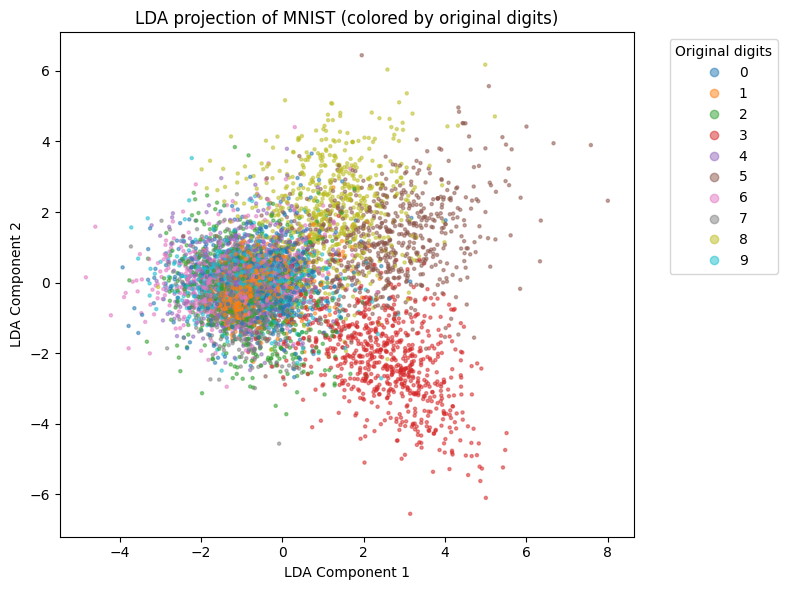

In [ ]:
# Use the LDA result from before (X_lda)
# Color points using the original MNIST labels (y)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_lda[:,0], X_lda[:,1], c=y, cmap="tab10", s=5, alpha=0.5)
plt.legend(handles=scatter.legend_elements()[0],
           labels=[str(i) for i in range(10)],
           title="Original digits",
           bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xlabel("LDA Component 1")
plt.ylabel("LDA Component 2")
plt.title("LDA projection of MNIST (colored by original digits)")
plt.tight_layout()
plt.show()

9. Run the analysis when the selected classes are "0", "1", and "8". Where will be the "6" and "9" in the LDA feature space

## Answer 9:

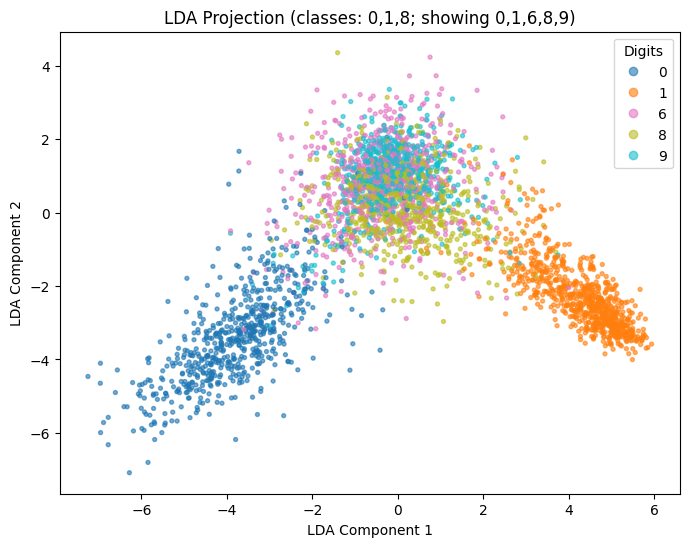

In [ ]:
# Select classes 0, 1, 8
classes = {0: 1, 1: 2, 8: 3}
y_mapped = np.array([classes.get(label, 0) for label in y])

# Flatten and fit LDA
X_flat = X.reshape(N, -1).astype(np.float32)
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_flat, y_mapped)

mask = np.isin(y, [0,1,6,8,9])
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_lda[mask,0], X_lda[mask,1],
                      c=y[mask], cmap="tab10", s=8, alpha=0.6)
plt.legend(handles=scatter.legend_elements()[0],
           labels=["0","1","6","8","9"], title="Digits")
plt.xlabel("LDA Component 1")
plt.ylabel("LDA Component 2")
plt.title("LDA Projection (training classes: 0,1,8; showing 0,1,6,8,9)")
plt.show()




When digits **0, 1, and 8** are selected as target classes, LDA separates them into distinct clusters. The projection shows that digits 6 and 9 both appear close to the 8 cluster.

# Problem 3 - QDA on EELS

Download EELS data. This is 12 EELS spectral data sets of indium-tin oxide cubes aquired by Kevin Roccapriore, measured at different resolutions and geometries. Pick the one you like!

In [ ]:
%%capture
!wget https://www.dropbox.com/s/nicyvttpihzh1cd/Plasmonic_sets_7222021_fixed.npy
loadedfile = np.load("Plasmonic_sets_7222021_fixed.npy", allow_pickle=True).tolist()

In [ ]:
print(type(loadedfile))      # overall type
print(loadedfile.keys())     # if it’s a dict, show available keys
entry = loadedfile["1"]
print(type(entry))
print(entry.keys())

<class 'dict'>
dict_keys(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'])
<class 'dict'>
dict_keys(['image', 'spectrum image', 'energy axis', 'scale'])


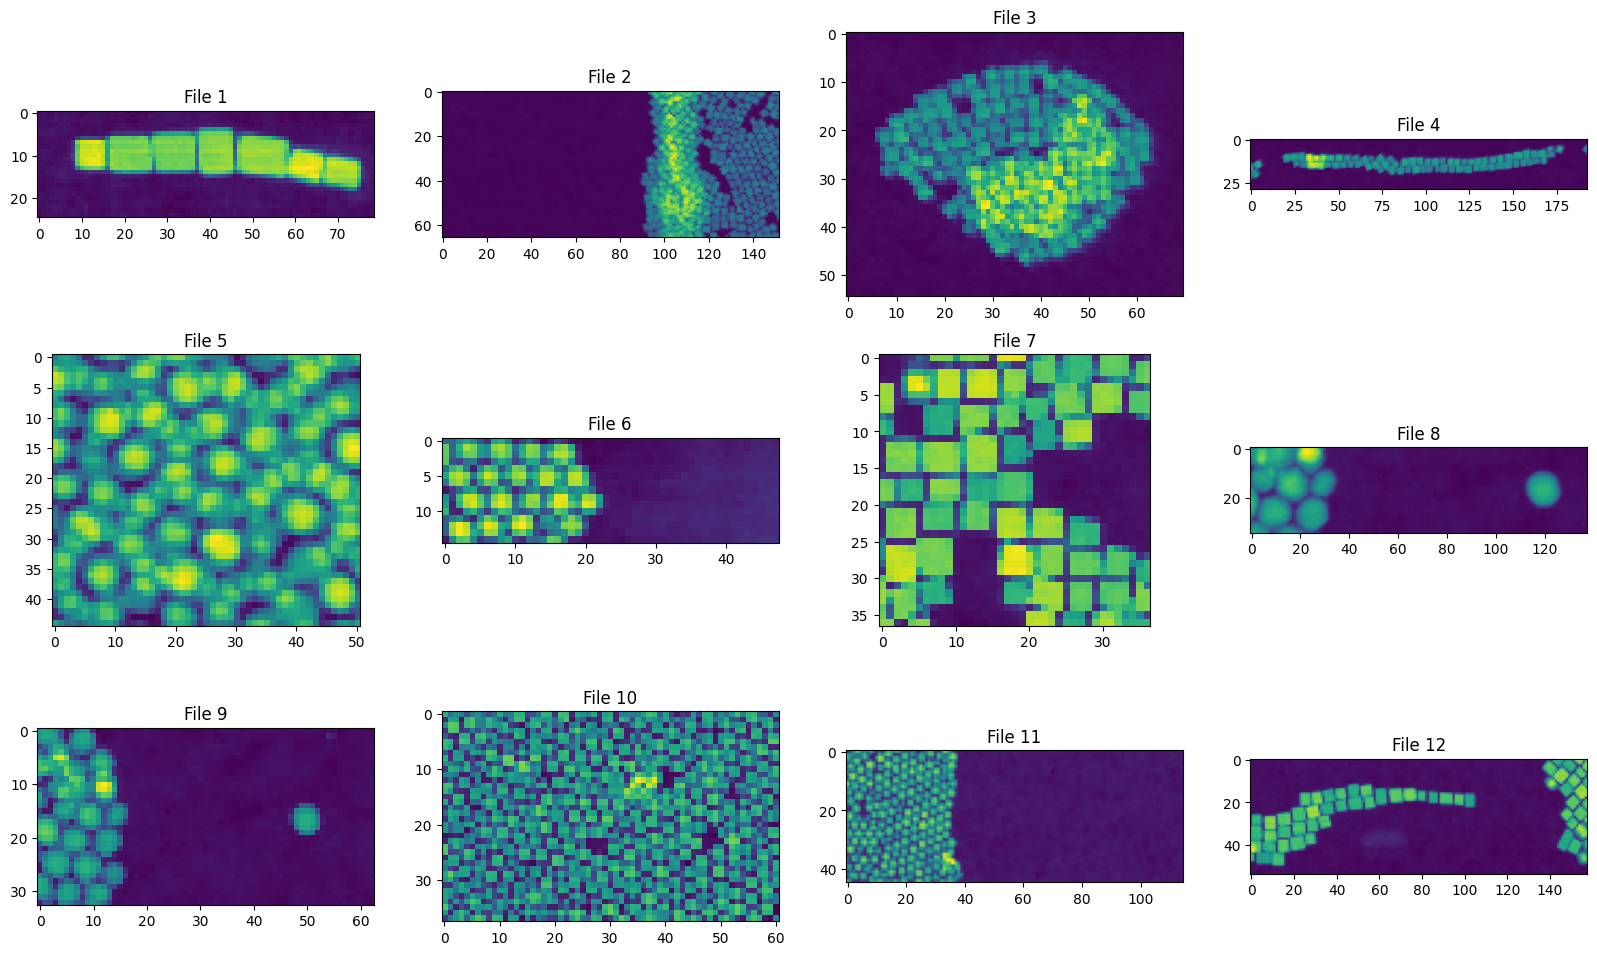

In [ ]:
num_im = len(loadedfile)
rows = int(np.ceil(float(num_im)/4))
cols = int(np.ceil(float(num_im)/rows))

gs = gridspec.GridSpec(rows, cols)
fig = plt.figure(figsize = (5*cols, 3*(1+rows)))

for kk in range(num_im):
    ax = fig.add_subplot(gs[kk])
    fileset  = loadedfile['{}'.format(kk+1)]
    f1,f2,f3,f4 = fileset
    img, data, e_ax, img_scale = fileset[f1], fileset[f2], fileset[f3], fileset[f4]
    ax.imshow(img)
    ax.set_title("File {}".format(kk+1))

In [ ]:
# Choose the file for analysis

k = 3
img = loadedfile['{}'.format(k)]['image']
specim = loadedfile['{}'.format(k)]['spectrum image']
e_ax = loadedfile['{}'.format(k)]['energy axis']
imscale = loadedfile['{}'.format(k)]['scale']

In [ ]:
# Read grid spectoscopy data

hdata = specim
hdata = hdata.astype(np.float64)

Visual inspection of the :

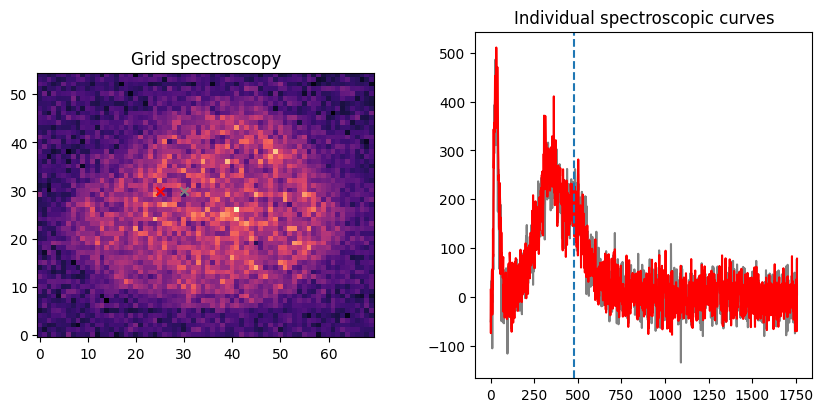

In [ ]:
# Select a slice and points for extracting idividual spectoscopic curves
# For convenience, we look at the data in pixels (however, we store the real scale as e_ax)

s = 480 # slice
pos1 = [30, 30]
pos2 = [25, 30]

# Plot
_, ax = plt.subplots(1, 2, figsize=(10, 4.5))
ax[0].imshow(hdata[..., s], cmap='magma', origin="lower")
ax[0].scatter(pos1[0], pos1[1], c='gray', marker='x')
ax[1].plot(hdata[pos1[1], pos1[0], :], c='gray')
ax[0].scatter(pos2[0], pos2[1], c='red', marker='x')
ax[1].plot(hdata[pos2[1], pos2[0], :], c='red')
ax[1].axvline(x=s, linestyle = '--')
ax[0].set_title('Grid spectroscopy')
ax[1].set_title('Individual spectroscopic curves')
plt.subplots_adjust(wspace=.3)

Important considerations for subsequent analysis.
 - For "real" analysis, make sure that before any subsequent analysis the data is properly curated. For EELS this is zero loss peak subtraction and log-log deconvolution. This will affect analysis very strongly (e.g. zero-loss peak will dominate everything if not accounted for).
 - You can also consider downsampling the data (just average pool).
 - Finally, always keep track on whether you normalize data and how (all spectra 0 to 1, or all normalized to total maximum)
 - And keep track on whether average is subtracted.
 - Normalization and average subtraction will affect the analysis results. In our experience, there is no right way or wrong way for doing it - different preprocessing highlights dissimilar aspects of the physics of the system. However, it is important to keep track of these.  

In [ ]:
X_vec = hdata.copy()
d1, d2, d3 = X_vec.shape
X_vec = X_vec.reshape(d1*d2, d3)
X_vec = (X_vec - np.min(X_vec)) / np.ptp(X_vec)

In [ ]:
d1, d2, d3

(55, 70, 1758)

Here we run the PCA analysis on EELS to visualzie the results

In [ ]:
# Select number of components
nc = 12

# Select decomposition type ('PCA' or 'NMF')
decomposition_type = 'PCA'

# Run decomposition
if decomposition_type == 'NMF':
    clf = decomposition.NMF(n_components=nc, random_state=42)
elif decomposition_type == 'PCA':
    clf = decomposition.PCA(n_components=nc, random_state=42)
else:
    raise NotImplementedError('Available methods: "PCA", "NMF"')
X_vec_t = clf.fit_transform(X_vec)
components = clf.components_
components = components.reshape(nc, d3)
print(components.shape, X_vec_t.shape)

(12, 1758) (3850, 12)


NUMBER OF COMPONENTS: 12
Components...


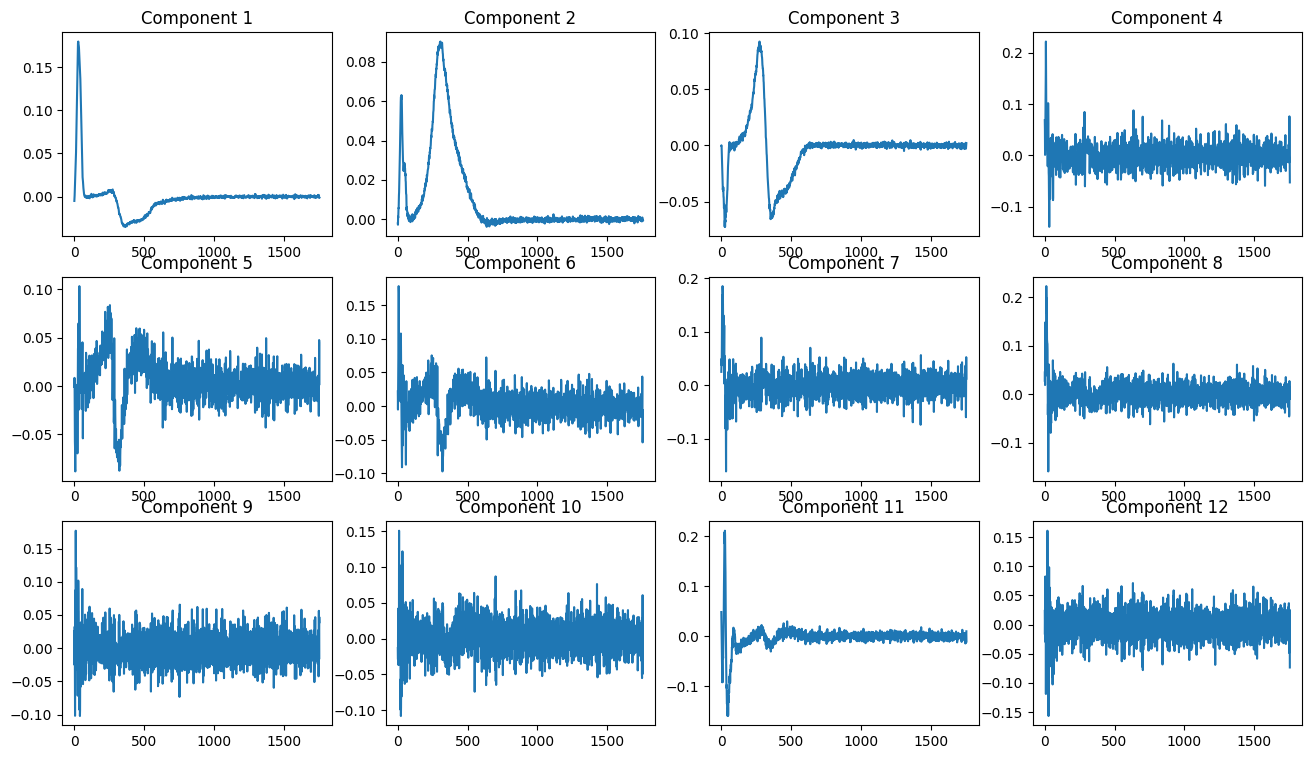

Abundance maps...


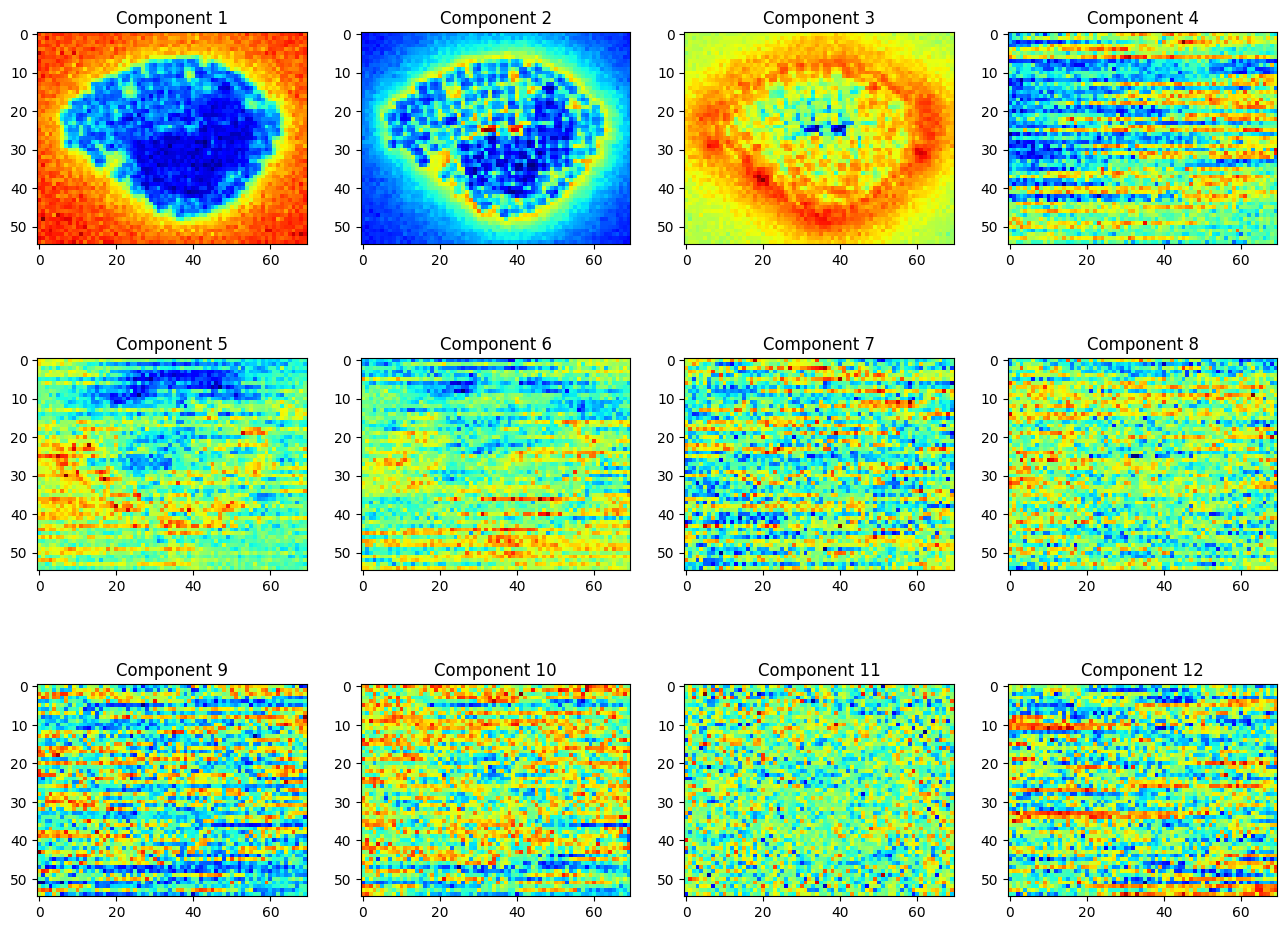

In [ ]:
rows = int(np.ceil(float(nc)/5))
cols = int(np.ceil(float(nc)/rows))

print('NUMBER OF COMPONENTS: ' + str(nc))
print('Components...')
gs1 = gridspec.GridSpec(rows, cols)
fig1 = plt.figure(figsize = (4*cols, 3.5*(1+rows)//1.5))
for i in range(nc):
    ax1 = fig1.add_subplot(gs1[i])
    j = 0
    ax1.plot(components[i])
    ax1.set_title('Component ' + str(i + 1))
plt.show()

print('Abundance maps...')
gs2 = gridspec.GridSpec(rows, cols)
fig2 = plt.figure(figsize = (4*cols, 4*(1+rows//1.5)))
for i in range(nc):
    ax2 = fig2.add_subplot(gs2[i])
    ax2.imshow(X_vec_t[:, i].reshape(d1, d2), cmap = 'jet')
    ax2.set_title('Component ' + str(i + 1))
plt.show()

10. Let's explore the QDA analysis on the EELS data set. Here, as a first step we need to create meaningful class labels. There are multiple ways we can make them based on the prior knowledge, physical intuition, or curiosity. Here, pick one of the three ways:
- Using the PCA images as a guide, identify ~10 points/class as class 1, 2, ... . Note that one class should be in the empty space (e.g. point (0,0) and few similar ones). Others can be identified as corners of the nanoparticle clusters, etc. In other words, we identify possible classes for spectra based on structural similarity of images
- We can also use the PCA maps to help "identify" classes. For example, using the peak finding function to identify dark/bright points on one of the PCA maps
- The output will be the 2D array of the same size as the the image, with most of the points having class label 0 and others being class labels 1, 2, ...


## Answer 10:

Class labels are constructed using PCA guidance. Bright and dark pixels from the first PCA component map are selected as seed points for two classes, while low-intensity pixels from the structural image defined a background class. The result is a 2D label array the same size as the image, with most pixels assigned as unlabeled (0) and a few curated pixels assigned to classes 1, 2, and 3. This labeled set is ready to be used for QDA training.

Label counts: {0: 3815, 1: 10, 2: 10, 3: 15}


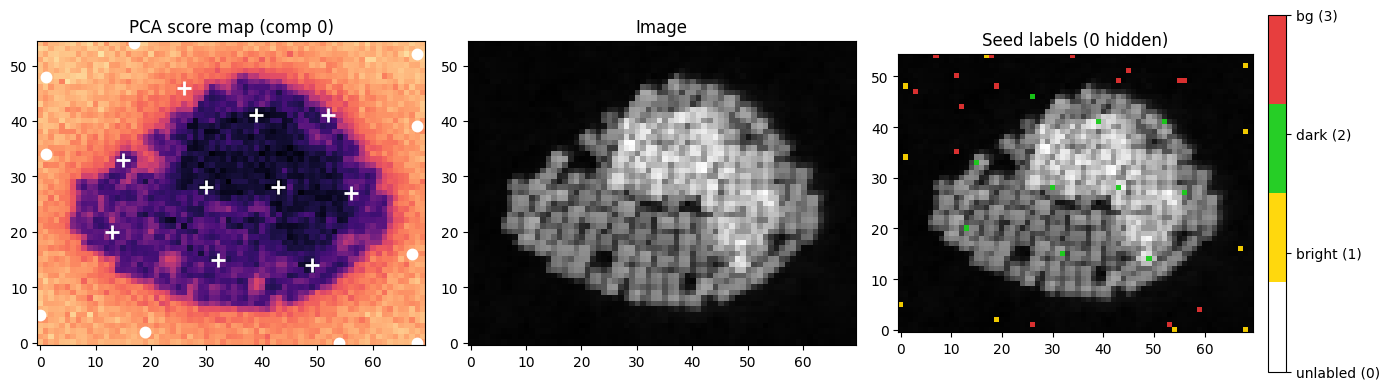

In [ ]:
# ---- Inputs from previous cells ----
# img       : structural image (H x W)
# hdata     : EELS hypercube (H x W x E)
# X_vec_t   : PCA/NMF scores of shape (H*W, nc) you computed above
# d1,d2,d3  : spatial dimensions + energy length
# nc        : number of components
# ------------------------------------------------
from matplotlib.colors import ListedColormap

# 1) pick a PCA abundance map to guide labels (choose the component index)
comp_idx = 0
score_map = X_vec_t[:, comp_idx].reshape(d1, d2)
score_map = (score_map - score_map.min()) / (np.ptp(score_map) + 1e-12)

# 2) simple non-maximum selection to pick non-overlapping bright/dark points
def pick_peaks_2d(arr, n_peaks=10, min_dist=6, mode='bright'):
    H, W = arr.shape
    coords, taken = [], np.zeros((H, W), dtype=bool)
    order = np.argsort(arr.ravel())[::-1] if mode == 'bright' else np.argsort(arr.ravel())

    def far_enough(y, x):
        y0, y1 = max(0, y - min_dist), min(H, y + min_dist + 1)
        x0, x1 = max(0, x - min_dist), min(W, x + min_dist + 1)
        return not taken[y0:y1, x0:x1].any()

    for idx in order:
        y, x = divmod(int(idx), W)
        if far_enough(y, x):
            coords.append((y, x))
            y0, y1 = max(0, y - min_dist), min(H, y + min_dist + 1)
            x0, x1 = max(0, x - min_dist), min(W, x + min_dist + 1)
            taken[y0:y1, x0:x1] = True
            if len(coords) >= n_peaks:
                break
    return coords

N_bright, N_dark = 10, 10
bright_pts = pick_peaks_2d(score_map, n_peaks=N_bright, min_dist=6, mode='bright')  # class 1
dark_pts   = pick_peaks_2d(score_map, n_peaks=N_dark,   min_dist=6, mode='dark')    # class 2

# 3) empty-space class (class 3) from low image intensity (fallback: low spectral norm)
img_norm = (img - img.min()) / (np.ptp(img) + 1e-12)
bg_mask = img_norm <= np.quantile(img_norm, 0.05)   # lowest 5%

if bg_mask.sum() < 5:  # fallback if image contrast is weak
    spec_norm = np.linalg.norm(hdata.reshape(-1, d3), axis=1)
    spec_norm = (spec_norm - spec_norm.min()) / (np.ptp(spec_norm) + 1e-12)
    bg_mask = (spec_norm <= np.quantile(spec_norm, 0.05)).reshape(d1, d2)

# 4) assemble label image (same size as the spatial map)
#    0 = unlabeled, 1 = bright peaks, 2 = dark peaks, 3 = empty space
labels2d = np.zeros((d1, d2), dtype=np.int32)
for (y, x) in bright_pts: labels2d[y, x] = 1
for (y, x) in dark_pts:
    if labels2d[y, x] == 0: labels2d[y, x] = 2

# sparsify background seeds to ~15 points
bg_coords = np.column_stack(np.where(bg_mask))
if len(bg_coords) > 0:
    rng = np.random.default_rng(42)
    sel = rng.choice(len(bg_coords), size=min(15, len(bg_coords)), replace=False)
    for y, x in bg_coords[sel]:
        labels2d[y, x] = 3

# 5) show counts and make the labels clearly visible (class 0 hidden/transparent)
unique, counts = np.unique(labels2d, return_counts=True)
print("Label counts:", dict(zip(unique.tolist(), counts.tolist())))

# transparent cmap: 0 invisible; 1=yellow, 2=green, 3=red
cmap_labels = ListedColormap([
    (0, 0, 0, 0.0),      # 0 -> transparent
    (1.0, 0.84, 0.0, .95),  # 1
    (0.10, 0.80, 0.10, .95),# 2
    (0.90, 0.20, 0.20, .95) # 3
])

lab_masked = np.ma.masked_where(labels2d == 0, labels2d)

fig, axs = plt.subplots(1, 3, figsize=(14, 4))
# PCA guide with picked seeds
axs[0].imshow(score_map, cmap='magma', origin='lower'); axs[0].set_title(f'PCA score map (comp {comp_idx})')
for (y, x) in bright_pts: axs[0].plot(x, y, 'wo', ms=7, mew=1.5)
for (y, x) in dark_pts:   axs[0].plot(x, y, 'w+', ms=10, mew=2.0)

# image
axs[1].imshow(img, cmap='gray', origin='lower'); axs[1].set_title('Image')

# labels overlaid (0 hidden)
axs[2].imshow(img, cmap='gray', origin='lower')
im = axs[2].imshow(lab_masked, cmap=cmap_labels, origin='lower', vmin=0, vmax=3)
axs[2].set_title('Seed labels (0 hidden)')
cbar = plt.colorbar(im, ax=axs[2], fraction=0.046, pad=0.04)
cbar.set_ticks([0, 1, 2, 3]); cbar.set_ticklabels(['unlabled (0)', 'bright (1)', 'dark (2)', 'bg (3)'])
plt.tight_layout(); plt.show()



11. Run the QDA analysis on the selected classes (meaning ignore the class 0 points)

## Answer 11:

Class counts: {1: 10, 2: 10, 3: 15}
Using PCA with n_components=9 (min_per_class-1 rule)


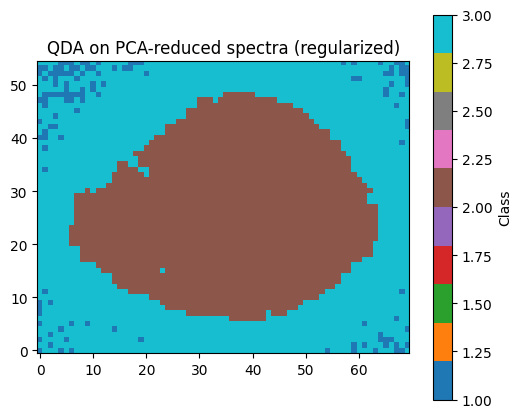

In [ ]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA


# Flatten spectra and labels
X_all = hdata.reshape(-1, d3).astype(np.float64)   # (H*W, E)
y_all = labels2d.reshape(-1)                       # (H*W,)

# Keep only labeled pixels (ignore 0)
mask = (y_all > 0)
X_train = X_all[mask]
y_train = y_all[mask]

# --- sanity: how many samples per class? ---
classes, counts = np.unique(y_train, return_counts=True)
min_per_class = counts.min()
print("Class counts:", dict(zip(classes.tolist(), counts.tolist())))

# --- normalize consistently ---
X_all_norm   = X_all   / (X_all.max()   + 1e-12)
X_train_norm = X_train / (X_train.max() + 1e-12)

# --- DIMENSION REDUCTION ---
# choose a safe #PCs: must be <= min_per_class-1 to make class covariances invertible
# cap at 30 to avoid overfitting, but ensure at least 2
safe_k = max(2, min(30, min_per_class - 1))
print(f"Using PCA with n_components={safe_k} (min_per_class-1 rule)")

pca = PCA(n_components=safe_k, svd_solver="full", random_state=42)
X_train_pca = pca.fit_transform(X_train_norm)
X_all_pca   = pca.transform(X_all_norm)

# --- QDA with stronger regularization ---
# If warnings persist, raise reg_param (e.g., 0.05 → 0.1 → 0.2)
qda = QDA(reg_param=0.15, store_covariance=True)
qda.fit(X_train_pca, y_train)

# Predict full map
y_pred = qda.predict(X_all_pca)
qda_map = y_pred.reshape(d1, d2)

plt.figure(figsize=(6,5))
plt.imshow(qda_map, cmap="tab10", origin="lower")
plt.title("QDA on PCA-reduced spectra (regularized)")
plt.colorbar(label="Class")
plt.show()


QDA is trained on the curated seed classes from Q10 (bright, dark, and background), ignoring unlabeled points (class 0). After fitting, the classifier is applied to every spectrum in the dataset, producing a full 2D classification map. This map highlights regions of structural similarity across the nanoparticle and shows how QDA can generalize spectral distinctions from a small set of labeled seeds.

12. Using the trained QDA model, classify the remaining spectra. Visualize the class labels image

## Answer 12:

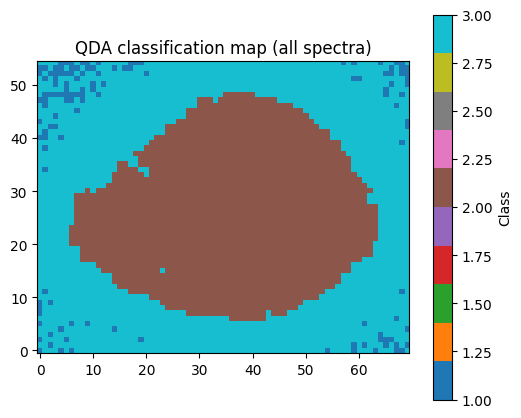

In [ ]:
# --- Q12: Use the trained QDA to classify all spectra and visualize labels ---

# y_pred already computed in Q11 with qda.predict(X_all_pca)
qda_map = y_pred.reshape(d1, d2)

plt.figure(figsize=(6,5))
plt.imshow(qda_map, cmap="tab10", origin="lower")
plt.title("QDA classification map (all spectra)")
plt.colorbar(label="Class")
plt.show()


The trained QDA model from Q11 is applied to all spectra in the dataset. Each pixel is assigned to one of the learned classes, producing a 2D classification map. This visualization shows how spectral regions identified from a small set of seed labels (bright, dark, and background) extend across the entire EELS map, revealing structurally distinct regions of the nanoparticle and separating them from the surrounding empty space.

# Problem 4 - MLR on EELS

Now, let's run the multiple regression analysis on the EELS data set. Here, we represent each EELS spectrum A(x,y,E) as a linear combination of endmember spectra A_i(E), i.e. try to find linear coefficients a1, a2, ... , an in A(x,y,E) = a1(x,y) A_1(E) + a2(x,y) A_2(E) + ... + an(x,y) A_n(E). Unlike the PCA analysis, the endmembers A_i(E) are **known**.

13. Create the endmembers by averaging within the classes that you created above

## Answer 13:

Endmembers shape: (3, 1758)


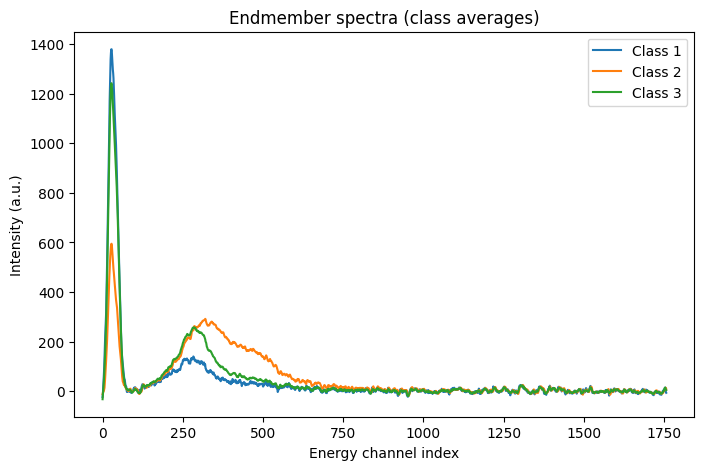

In [ ]:
# Flatten spectra and class labels
X_all = hdata.reshape(-1, d3).astype(np.float64)   # (Npix, E)
y_all = qda_map.reshape(-1)                        # (Npix,)

# Get unique classes (excluding 0 if present)
classes = np.unique(y_all)
classes = classes[classes > 0]   # ignore background class 0 if it slipped in

# Compute class-average spectra = endmembers
endmembers = {}
for c in classes:
    mask = (y_all == c)
    endmembers[c] = X_all[mask].mean(axis=0)

# Stack into an array for convenience
A_end = np.vstack([endmembers[c] for c in classes])

print("Endmembers shape:", A_end.shape)  # (n_classes, E)

# Plot endmember spectra
plt.figure(figsize=(8,5))
for i, c in enumerate(classes):
    plt.plot(endmembers[c], label=f'Class {c}')
plt.xlabel("Energy channel index")
plt.ylabel("Intensity (a.u.)")
plt.title("Endmember spectra (class averages)")
plt.legend()
plt.show()


Endmember spectra are generated by averaging the EELS spectra within each class obtained from the QDA classification. Each class label corresponds to a structurally distinct region of the dataset (bright, dark, background). Averaging the spectra across all pixels belonging to a class yields a representative spectrum for that region. These averaged spectra serve as the **endmembers** $A_i(E)$ that will be used in the linear regression step, forming the spectral basis for reconstructing individual spectra across the dataset.
* class 1 -> bright
* class 2 -> dark
* class 3 -> background

14. Create the function that takes unknown spectrum A(E) and known endmember spectra A_i(E), and fits A(E) with linear function A(x,y,E) = a1(x,y) A_1(E) + a2(x,y) A_2(E) + ... + an(x,y) A_n(E) to yield the constants a1, ..., an and fit error. Show the results of the fit for several points.

## Answer 14:

Test pixels (y, x): [(48, 6), (25, 55), (31, 63)]


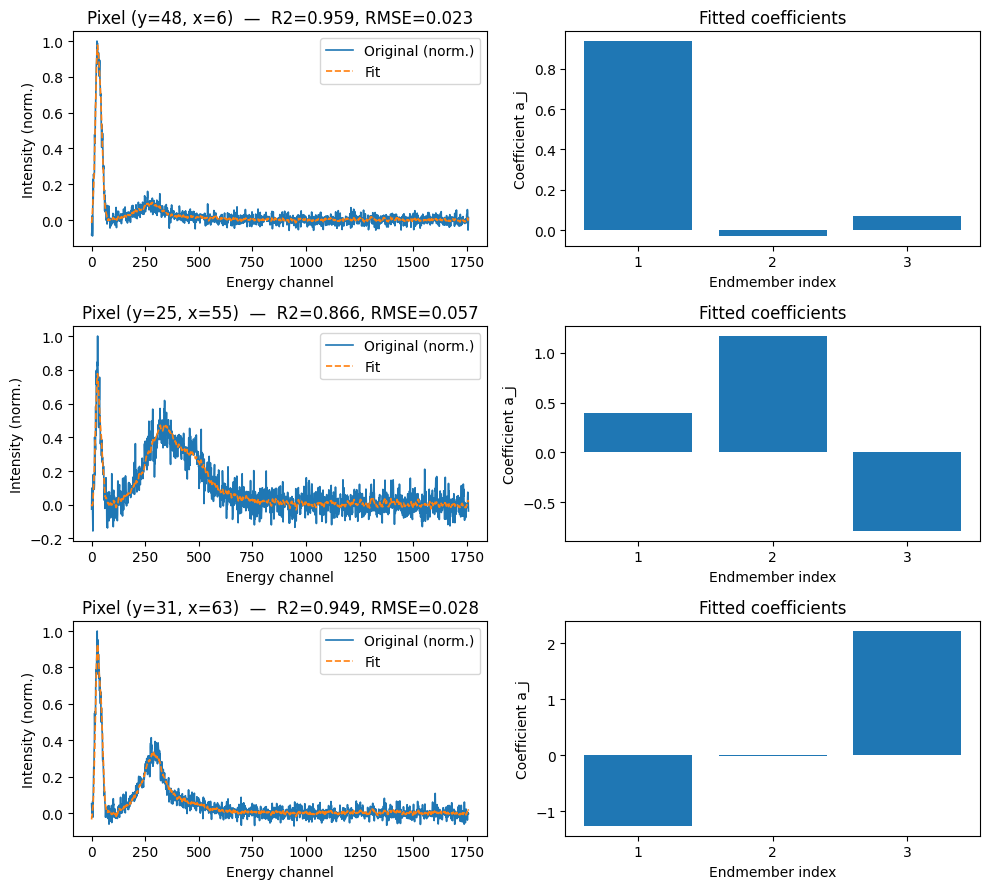

In [ ]:
# ---------- Q14: linear unmixing (least squares) ----------
def fit_spectrum(A_unknown, endmembers, normalize='max'):
    """
    Fit A_unknown(E) ~ sum_j a_j * A_j(E) by linear least-squares (through origin).
    Args:
        A_unknown : (E,) spectrum
        endmembers: (n_end, E) array; each row is an endmember spectrum
        normalize : None | 'max' | 'l2'
            Optional per-spectrum normalization applied to both unknown and endmembers
            to improve conditioning. ('max' is usually safe for EELS.)
    Returns:
        coeffs : (n_end,) least-squares coefficients a_j
        recon  : (E,) reconstructed spectrum
        errs   : dict with RMSE, MAE, R2
    """
    A = endmembers.astype(np.float64).copy()  # (n_end, E)
    b = np.asarray(A_unknown, dtype=np.float64).copy()  # (E,)

    # optional normalization for conditioning
    def norm_vec(x):
        if normalize is None:
            return x
        if normalize == 'max':
            return x / (np.max(x) + 1e-12)
        if normalize == 'l2':
            return x / (np.sqrt(np.sum(x*x)) + 1e-12)
        return x

    for i in range(A.shape[0]):
        A[i] = norm_vec(A[i])
    b = norm_vec(b)

    # Build design matrix with endmembers as columns: (E, n_end)
    M = A.T
    # Least-squares (through origin). For nonnegativity you could use scipy.optimize.nnls.
    coeffs, *_ = np.linalg.lstsq(M, b, rcond=None)

    recon = M @ coeffs
    resid = b - recon
    rmse = float(np.sqrt(np.mean(resid**2)))
    mae  = float(np.mean(np.abs(resid)))
    ss_res = float(np.sum(resid**2))
    ss_tot = float(np.sum((b - np.mean(b))**2)) + 1e-12
    r2 = float(1.0 - ss_res/ss_tot)

    errs = {"RMSE": rmse, "MAE": mae, "R2": r2}
    return coeffs, recon, errs


# ---------- demo: fit several pixels and visualize ----------
# Make sure endmembers are in (n_end, E)
A_end_arr = np.asarray(A_end, dtype=np.float64)  # from Q13
n_end, E = A_end_arr.shape

# choose some test pixels:
#  - one from each QDA class if available; else pick arbitrary points
test_coords = []

for cls in [1, 2, 3]:
    ys, xs = np.where(qda_map == cls)
    if len(ys) > 0:
        test_coords.append((int(ys[len(ys)//2]), int(xs[len(xs)//2])))
# ensure we have at least 3 examples
while len(test_coords) < 3:
    test_coords.append((np.random.randint(0, d1), np.random.randint(0, d2)))

print("Test pixels (y, x):", test_coords)

# Fit and plot
fig, axes = plt.subplots(len(test_coords), 2, figsize=(10, 3*len(test_coords)), squeeze=False)

for i, (yy, xx) in enumerate(test_coords):
    spec = hdata[yy, xx, :].astype(np.float64)

    coeffs, recon, errs = fit_spectrum(spec, A_end_arr, normalize='max')

    # Left: spectrum vs reconstruction
    ax0 = axes[i, 0]
    ax0.plot(spec / (np.max(spec) + 1e-12), label="Original (norm.)", linewidth=1.2)
    ax0.plot(recon, label="Fit", linestyle='--', linewidth=1.2)
    ax0.set_title(f"Pixel (y={yy}, x={xx})  —  R2={errs['R2']:.3f}, RMSE={errs['RMSE']:.3f}")
    ax0.set_xlabel("Energy channel")
    ax0.set_ylabel("Intensity (norm.)")
    ax0.legend()

    # Right: coefficients (abundances)
    ax1 = axes[i, 1]
    ax1.bar(np.arange(n_end)+1, coeffs)
    ax1.set_xticks(np.arange(n_end)+1)
    ax1.set_xlabel("Endmember index")
    ax1.set_ylabel("Coefficient a_j")
    ax1.set_title("Fitted coefficients")

plt.tight_layout()
plt.show()


A function is implemented to fit any unknown spectrum as a linear combination of the known endmember spectra derived in Q13. The fitting is performed using least-squares optimization, and the output included the coefficients for each endmember as well as the reconstruction error (RMSE and $R^2$).

The fits are demonstrated for several pixels from different spatial regions. The reconstructed spectra closely matches the original spectra, with $R^2$ values between 0.86 and 0.96. The bar plots of the coefficients shows how the contribution of each endmember varies depending on the pixel location, reflecting physical differences between particle interior, particle edge, and background.

15. Apply this function to the chosen EELS data set and visualize the results, i.e. the maps of coefficients a_i(x,y) and error map.

## Answer 15:

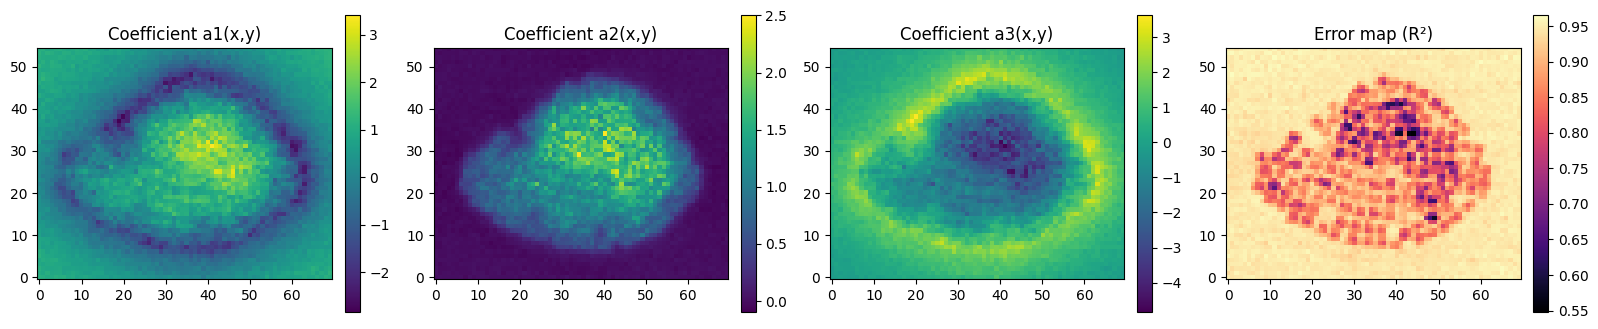

In [ ]:
# ---- inputs assumed available ----
# hdata: (d1, d2, d3)  EELS cube
# A_end: (n_end, d3)   endmember spectra (from Q13)
# fit_spectrum: function from Q14
# ----------------------------------

def unmix_cube(hdata, A_end, normalize='max', error_metric='R2'):
    """
    Apply linear unmixing to every pixel spectrum in the cube.
    Returns:
        coeff_maps : (d1, d2, n_end)
        err_map    : (d1, d2)   (RMSE or R2)
    """
    d1, d2, d3 = hdata.shape
    n_end = A_end.shape[0]

    coeff_maps = np.zeros((d1, d2, n_end), dtype=np.float64)
    err_map = np.zeros((d1, d2), dtype=np.float64)

    for y in range(d1):
        for x in range(d2):
            spec = hdata[y, x, :].astype(np.float64)
            coeffs, recon, errs = fit_spectrum(spec, A_end, normalize=normalize)
            coeff_maps[y, x, :] = coeffs
            err_map[y, x] = errs[error_metric]
    return coeff_maps, err_map

# ---- run unmixing on the whole dataset ----
coeff_maps, err_map = unmix_cube(hdata, np.asarray(A_end), normalize='max', error_metric='R2')
d1, d2, d3 = hdata.shape
n_end = coeff_maps.shape[-1]

# ---- visualize coefficient maps and error map ----
rows = 1
cols = n_end + 1  # n_end coeff maps + 1 error map
fig, axs = plt.subplots(rows, cols, figsize=(4*cols, 4), squeeze=False)

for i in range(n_end):
    ax = axs[0, i]
    im = ax.imshow(coeff_maps[:, :, i], cmap='viridis', origin='lower')
    ax.set_title(f'Coefficient a{i+1}(x,y)')
    fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

# R2 map (or RMSE if you chose that metric)
ax = axs[0, -1]
im = ax.imshow(err_map, cmap='magma', origin='lower')
ax.set_title('Error map (R²)')
fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()


The unmixing function was applied to every spectrum in the EELS cube using the class-average endmembers from Q13. For each pixel, the model $A(E) \approx \sum_i a_i A_i(E)$ was fit by least squares to obtain the coefficients $a_i(x,y)$ and a fit quality metric ($R^2$). The resulting coefficient maps show the spatial distribution of each endmember across the sample, while the error map highlights regions where the linear mixing model under-/over-fits the data.